In [1]:
%load_ext autoreload
%autoreload complete
# %aimport ...

In [55]:
%autoreload complete

In [2]:
from robotodo.engines.isaac._kernel import Kernel
kernel = Kernel(kit_path="isaacsim.exp.full.kit")
kernel.start_app_loop_soon()


[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'
2025-09-23T04:00:43Z s] [Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
[0.059s] [ext: omni.kit.async_engine-0.0.3] startup
[0.245s] [ext: omni.metrics.core-0.0.3] startup
[0.245s] [ext: omni.client.lib-1.1.0] startup
[0.259s] [ext: omni.blobkey-1.1.2] startup
[0.259s] [ext: omni.stats-1.0.1] startup
[0.260s] [ext: omni.datastore-0.0.0] startup
[0.265s] [ext: omni.client-1.3.0] startup
[0.320s] [ext: omni.ujitso.default-1.0.0] startup
[0.322s] [ext: omni.hsscclient-1.1.2] startup
[0.325s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.327s] [ext: omni.

[11.711s] [ext: isaacsim.ros2.bridge-4.9.3] startup
2025-09-23T04:00:55Z [11,716ms] [Warning] [isaacsim.ros2.bridge.impl.extension] ROS_DISTRO env var not found, Please source ROS before enabling this extension
[11.734s] Using backup internal ROS2 humble distro
Checking to see if RMW can be loaded:
failed to get symbol 'rmw_init_options_init' due to Environment variable 'AMENT_PREFIX_PATH' is not set or empty, at /workspace/humble_ws/src/rmw_implementation/src/functions.cpp:171, at /workspace/humble_ws/src/rcl/rcl/src/rcl/init_options.c:75
RMW was not loaded

[11.741s] To use the internal libraries included with the extension please set the following environment variables to use with FastDDS (default) or CycloneDDS before starting Isaac Sim:

FastDDS (default):
export ROS_DISTRO=humble
export RMW_IMPLEMENTATION=rmw_fastrtps_cpp
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/isaacsim/exts/isaacsim.ros2.bridge/humble/lib

OR

Cyclo

2025-09-23T04:00:55Z [11,723ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


In [3]:
from robotodo.engines.isaac.scene import Scene

scene = Scene(_kernel=kernel)

[11.825s] [ext: isaacsim.ros2.bridge-4.9.3] shutdown
2025-09-23T04:00:55Z [12,042ms] [Warning] [omni.ext._impl._internal] isaacsim.ros2.bridge-4.9.3 -> <class 'isaacsim.ros2.bridge.impl.samples.ros_moveit_sample.Extension'>: extension object is still alive, something holds a reference on it. References: ["[0]:type: <class 'method'>, id: 139716671957696", "[1]:type: <class 'method'>, id: 139716671953984"]
2025-09-23T04:00:56Z [12,276ms] [Warning] [omni.ext._impl._internal] isaacsim.ros2.bridge-4.9.3 -> <class 'isaacsim.ros2.bridge.impl.samples.ros_waypoint_follower_sample.Extension'>: extension object is still alive, something holds a reference on it. References: ["[0]:type: <class 'method'>, id: 139716671953600", "[1]:type: <class 'method'>, id: 139716671881024"]
2025-09-23T04:00:56Z [12,320ms] [Warning] [omni.ext._impl._internal] isaacsim.ros2.bridge-4.9.3 -> <class 'isaacsim.ros2.bridge.impl.samples.ros_samples.Extension'>: extension object is still alive, something holds a reference

In [52]:
import sys

import importlib
importlib.reload(sys.modules["robotodo.engines.isaac.camera"])

<module 'robotodo.engines.isaac.camera' from '/home/sysadmin/lab/robotodo/packages/robotodo/engines/isaac/camera.py'>

In [122]:
from robotodo.engines.isaac.camera import Camera


cam = Camera("/World/Camera_01", (720, 1280), scene=scene)

In [123]:
cam._todo_resolution

Resolution(height=720, width=1280)

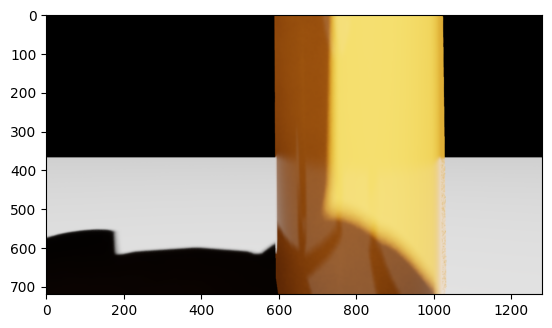

In [126]:
import matplotlib.pyplot as plt

plt.imshow(cam.image[0].cpu())



In [108]:
cam._todo_resolution

(720, 1280)

In [107]:
import omni
omni.replicator.core.create.render_product_tiled?

Signature:
omni.replicator.core.create.render_product_tiled(
    cameras: List[Union[str, omni.replicator.core.scripts.utils.utils.ReplicatorItem]],
    tile_resolution: Tuple[int, int],
    force_new: bool = False,
    name: Optional[str] = None,
) -> omni.replicator.core.scripts.utils.viewport_manager.HydraTexture
Docstring:
Creates a single render product to render multiple sensor tiles.

Creates a render product attached to a list of sensors and outputs a tiled buffer with the output of all attached
sensors. Tiled rendering is most performant when rendering a large number of sensors at low resolution. Returns a
``HydraTexture`` object with resolution equal ``tile_resolution[0] * ceil(sqrt(len(cameras))),
tile_resolution[1] * ceil(sqrt(len(cameras))``.

Note: Only a single tiled resolution is allowed per session. Creating more render products with different tiled
resolution will cause the previous tiled render products to render incorrectly.

Args:
    cameras: List of cameras to at

In [92]:
cam.image.shape

torch.Size([1, 720, 1280, 4])

In [127]:
%timeit -n 10 cam.image

265 μs ± 44.5 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
cam.image[0, :, :, 0]

array(shape=(200, 100), dtype=uint8)

In [23]:
print(cam.image)

[[[[  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]
   ...
   [  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]]

  [[  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]
   ...
   [  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]]

  [[  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]
   ...
   [  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]]

  ...

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ...
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ...
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ...
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]]]


In [39]:
import numpy
import warp

im = cam.image
%timeit -n 10 warp.to_torch(im)

9.54 μs ± 5.06 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
